### Importing libraries,tools and dependencies

In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

### Loading the dataset into pandas dataframe

In [162]:
data =pd.read_csv("big_mart_data.csv")

In [163]:
#to display the first top 10 rows of the dataset
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [166]:
# to see how many rows and columns are there
data.shape

(8523, 12)

In [167]:
#to display the metadata or information of the datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### there are many **categorical features** here
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [171]:
# to see how many null values are there on each columns
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [172]:
# to display the statistical representation of the dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Handling missing Values
- mean for numerical
- mode for categorical

In [175]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [176]:
data['Item_Weight'].isnull().sum()

0

In [178]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [179]:
data['Outlet_Size'].isnull().sum()

0

In [182]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### visualizing the distributions of Numericals

### 1 . distribution of Item_Weight

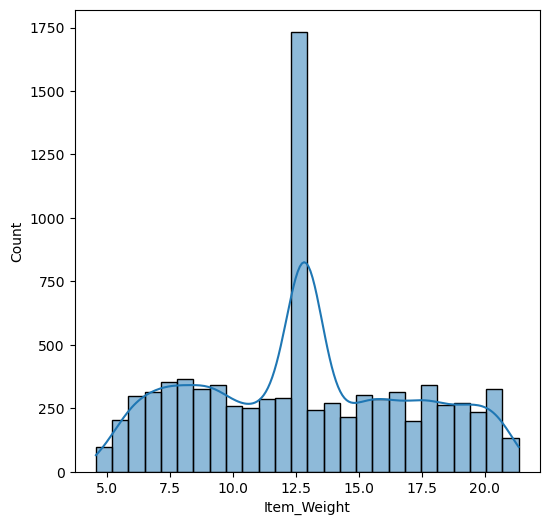

In [187]:
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Weight'],kde=True) #'kde=True' adds the smooth curve
plt.show()

### 2 . visualizing the distribution of Item_Visibility

<function matplotlib.pyplot.show(close=None, block=None)>

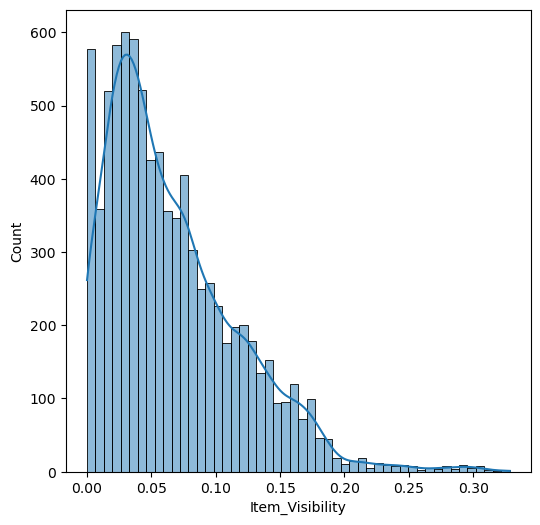

In [190]:
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Visibility'],kde=True) 
plt.show

### 3.visualizing the distribution of Item_MRP

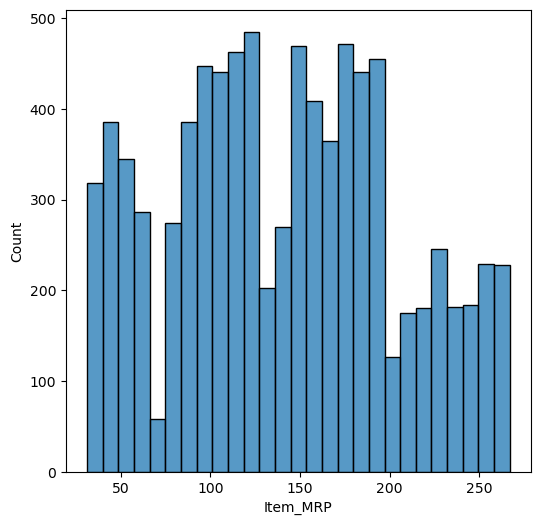

In [193]:
plt.figure(figsize=(6,6))
sns.histplot(data['Item_MRP'])
plt.show()

### 4. visualizing the Outlet_Establishment_Year

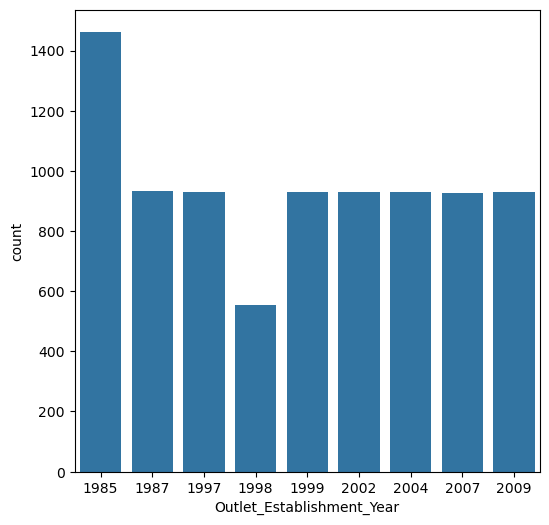

In [197]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=data)
plt.show()

### visualizing the Categoricals

### 1. visualizing the Item_Fat_Content

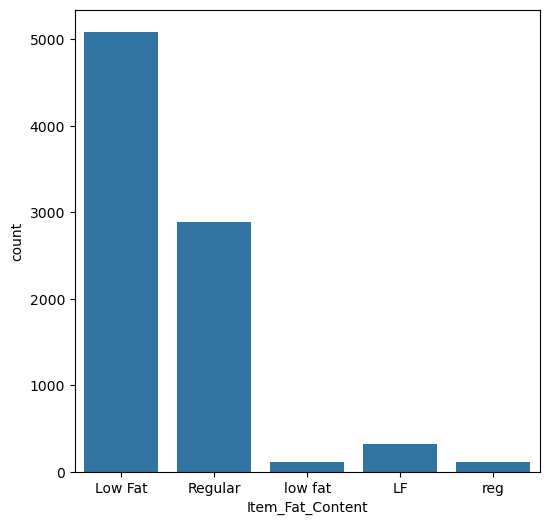

In [201]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=data)
plt.show()

### 2. visualizing Item_Type

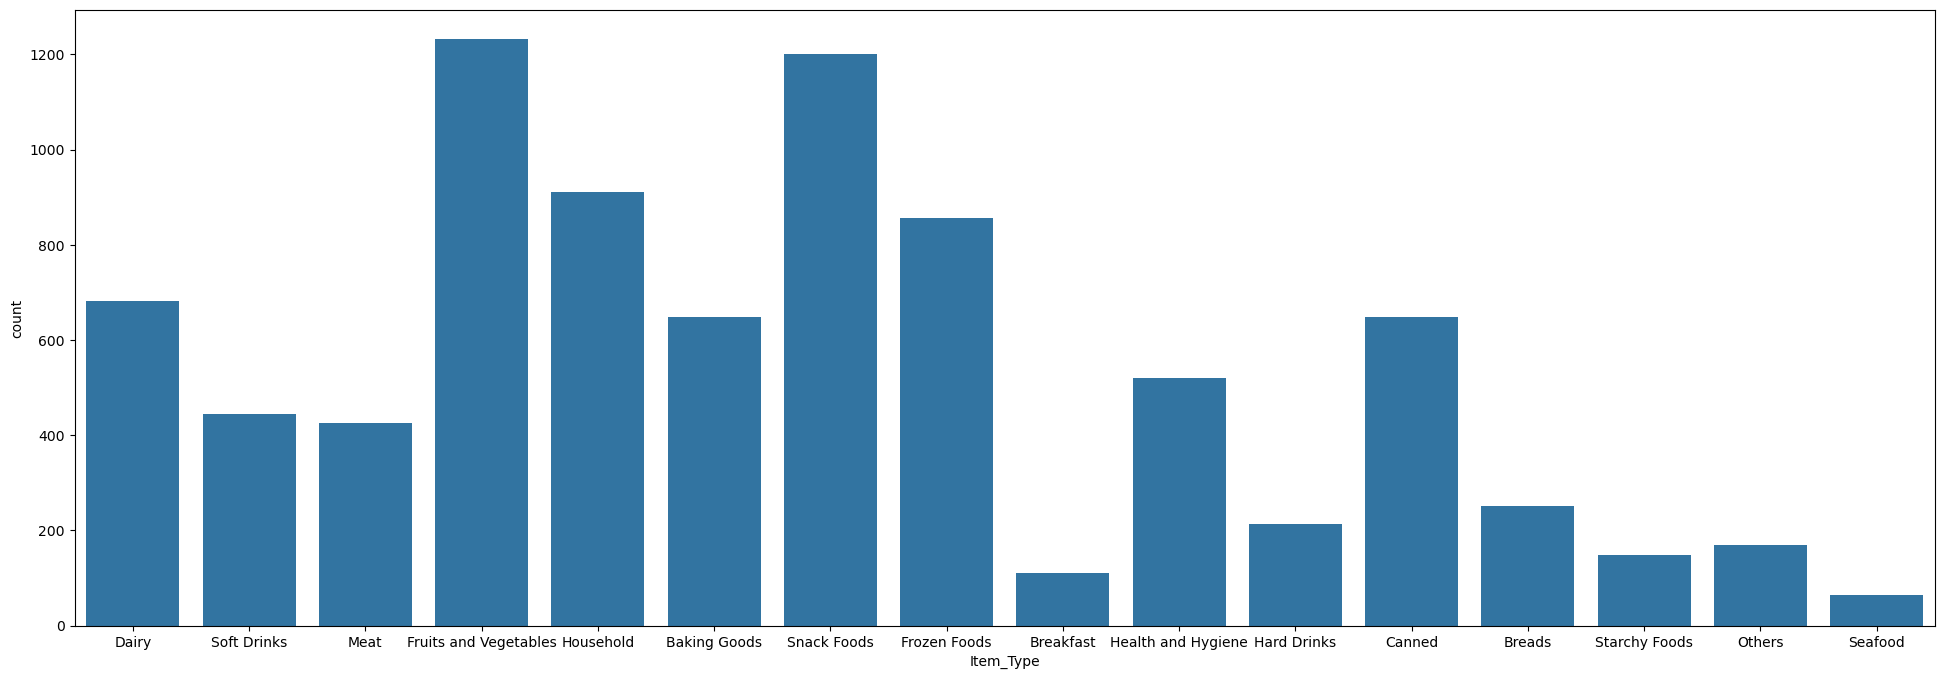

In [204]:
plt.figure(figsize=(24,8))
sns.countplot(x='Item_Type',data=data)
plt.show()

### 3.visualizing Outlet_Size

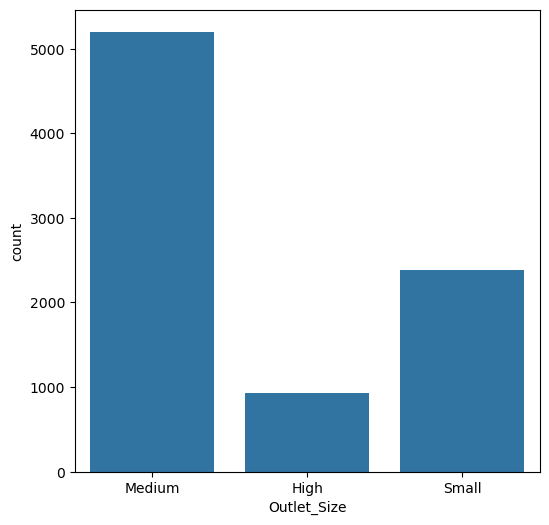

In [207]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=data)
plt.show()

### 4 . visualizing Outlet_Location_Type

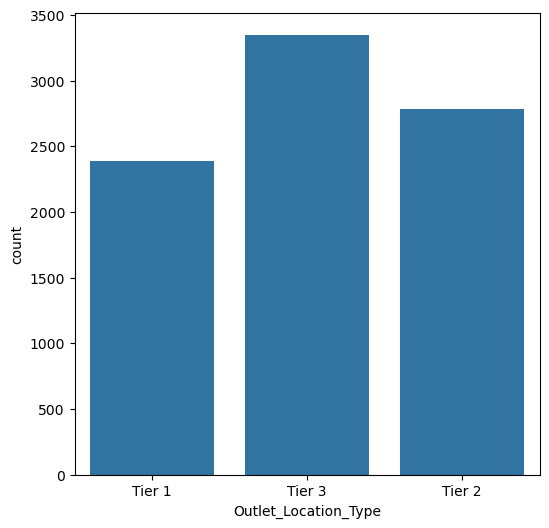

In [210]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data=data)
plt.show()

### 5.visualizing Outlet_Type

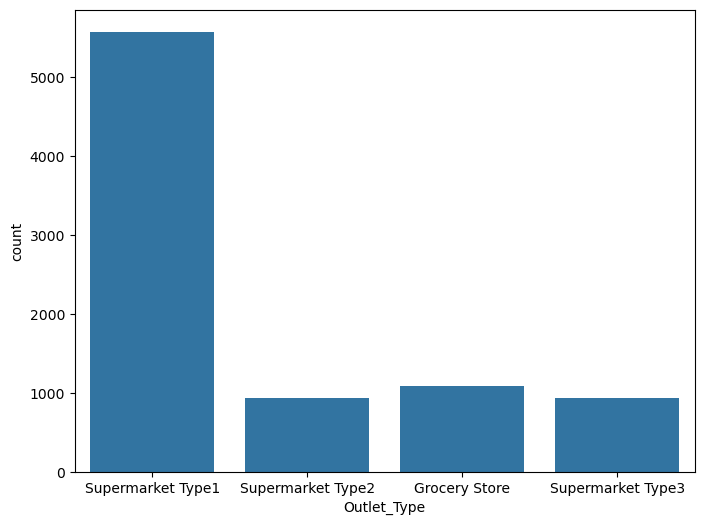

In [213]:
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Type',data=data)
plt.show()

## Data Pre-processing

In [216]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### replacing given different name for the same :  in Item_Fat_Content

In [219]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [221]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [223]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Label encoding

In [229]:
# lets change the all the categorical and object data type so that our model understands
#Item_Identifier
#Item_Fat_Content
#Item_Type
#Outlet_Identifier
#Outlet_Size
#Outlet_Location_Type
#Outlet_Type
encoder=LabelEncoder()
data['Item_Identifier']=encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']=encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']=encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']=encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']=encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=encoder.fit_transform(data['Outlet_Type'])

In [231]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### spliting the feature and target

In [240]:
X= data.drop(columns='Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']

In [242]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [244]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Train test split

In [256]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [258]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6818, 11) (1705, 11) (6818,) (1705,)


### Model Training

In [261]:
model = XGBRegressor()

In [263]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Model evaluation on training

In [281]:
prediction_train = model.predict(X_train)
r2_train = metrics.r2_score(y_train,prediction_train)
print("model performs R2 value 0f  :",r2_train)

model performs R2 value 0f  : 0.8757573565795517


### Model evalaution on testing

In [284]:
prediction_test = model.predict(X_test)
r2_test = metrics.r2_score(y_test,prediction_test)
print("model performs R2 value of:",r2_test)

model performs R2 value of: 0.5322944924053683
